In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('AAPL.csv')

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df1=df.reset_index()['close']

In [7]:
import matplotlib.pyplot as plt

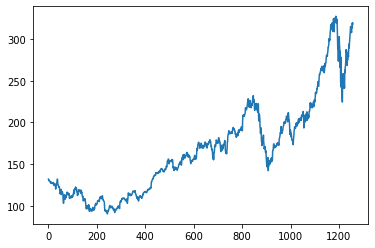

In [8]:
plt.plot(df1)

In [10]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [26]:
df1[10,0]

0.16271215063750738

In [24]:
def train_test_split(df,p):
  sz=int(len(df)*p)
  training=df[:sz]
  test=df[sz:]

  return training,test

In [25]:
x1,x2=train_test_split(df1,0.65)

In [30]:
def make_series(a,steps=1):
  b=[]
  c=[]
  for i in range(len(a)-steps):
    b.append(a[i:i+steps,0])
    c.append(a[i+steps,0])
  
  return np.array(b),np.array(c)

In [35]:
steps=100

In [36]:
X_train,y_train=make_series(x1,steps)

In [38]:
X_test,y_test=make_series(x2,steps)

In [39]:
X_train.shape

(717, 100)

In [40]:
y_train.shape

(717,)

In [41]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [42]:
import tensorflow as tf

In [45]:
from tensorflow.keras.layers import Embedding,LSTM,DenseFeatures,Dense
from tensorflow.keras.models import Sequential

In [46]:
m=Sequential()
m.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
m.add(LSTM(50,return_sequences=True))
m.add(LSTM(50))
m.add(Dense(1))
m.compile(loss='mean_squared_error',optimizer='adam')
print(m.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
m.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
12/12 [==============================] - 8s 293ms/step - loss: 0.0230 - val_loss: 0.0418
Epoch 2/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0043 - val_loss: 0.0052
Epoch 3/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0015 - val_loss: 0.0043
Epoch 4/100
12/12 [==============================] - 2s 183ms/step - loss: 7.8122e-04 - val_loss: 0.0041
Epoch 5/100
12/12 [==============================] - 2s 184ms/step - loss: 6.1505e-04 - val_loss: 0.0039
Epoch 6/100
12/12 [==============================] - 2s 183ms/step - loss: 5.9758e-04 - val_loss: 0.0038
Epoch 7/100
12/12 [==============================] - 2s 184ms/step - loss: 5.9061e-04 - val_loss: 0.0039
Epoch 8/100
12/12 [==============================] - 2s 183ms/step - loss: 5.8771e-04 - val_loss: 0.0036
Epoch 9/100
12/12 [==============================] - 2s 184ms/step - loss: 6.0103e-04 - val_loss: 0.0037
Epoch 10/100
12/12 [==============================] - 2s 184ms/step

In [48]:
train_pred=m.predict(X_train)
test_pred=m.predict(X_test)

In [50]:
train_pred=scaler.inverse_transform(train_pred)
test_pred=scaler.inverse_transform(test_pred)

In [51]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_pred))

142.71877494623692

In [52]:
math.sqrt(mean_squared_error(y_test,test_pred))

239.03410939460744

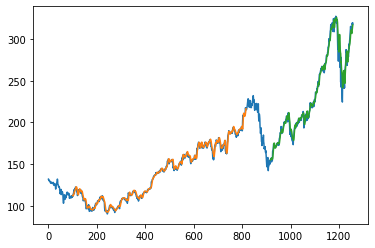

In [81]:
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
for i in range(steps,steps+len(train_pred)):
  trainPredictPlot[i]=train_pred[i-steps]

testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
for i in range(steps,steps+len(test_pred)):
  testPredictPlot[i+len(X_train)+steps]=test_pred[i-steps]

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)